In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load the data from Excel file
file_path = r"C:\Users\Yucehan Kutlu\Documents\Data Science\DataGen\DATA\Wind2013_2023.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [33]:
# Assuming the time series data is in a column named 'value'
# Adjust column name as per your data
df['date'] = pd.to_datetime(df['date'])  # Adjust 'date' to your actual datetime column
#df.set_index('date', inplace=True)
#time_series_data = df['electricity']


In [34]:
df


,date,electricity
0,2013-01-01 00:00:00,0.228
1,2013-01-01 01:00:00,0.229
2,2013-01-01 02:00:00,0.220
3,2013-01-01 03:00:00,0.200
4,2013-01-01 04:00:00,0.180
...,...,...
96403,2023-12-31 19:00:00,0.071
96404,2023-12-31 20:00:00,0.098
96405,2023-12-31 21:00:00,0.104
96406,2023-12-31 22:00:00,0.095


In [38]:
df = df.resample('M', on='date').mean()
df.reset_index(inplace=True)
df

,date,electricity
0,2013-01-31,0.351499
1,2013-02-28,0.265683
2,2013-03-31,0.326691
3,2013-04-30,0.240386
4,2013-05-31,0.268418
...,...,...
127,2023-08-31,0.410823
128,2023-09-30,0.422808
129,2023-10-31,0.292875
130,2023-11-30,0.397239


Text(0.5, 1.0, 'Monthly Averate Wind Generation Data')

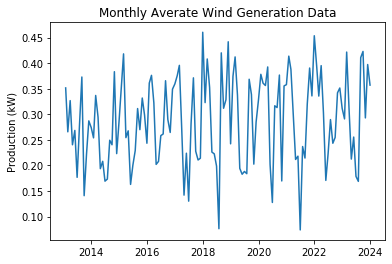

In [39]:
plt.plot(df.set_index('date')['electricity'])
plt.ylabel('Production (kW)')
plt.title("Monthly Averate Wind Generation Data")

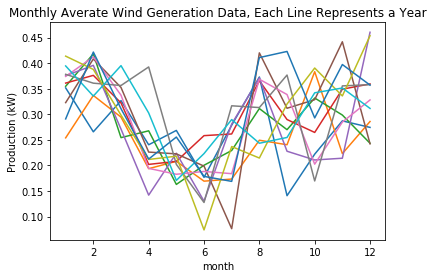

In [40]:
df_seperated = df.copy(deep=True)
df_seperated = df_seperated[['date', 'electricity']]
df_seperated['year'] = df_seperated['date'].dt.year
df_seperated['month'] = df_seperated['date'].dt.month
df_seperated.drop(['date'], axis=1, inplace=True)
df_seperated = df_seperated.pivot_table(index='month',  columns='year', values='electricity')

df_seperated.plot()
plt.ylabel('Production (kW)')
plt.title("Monthly Averate Wind Generation Data, Each Line Represents a Year")
plt.legend().remove()
plt.show()

In [42]:
#Taking a deep copy of the weather DataFrame
df_linear = df.copy(deep=True)
df_linear['month'] = pd.DatetimeIndex(df_linear['date']).month

#One-hot-encoding of month data
df_linear = pd.get_dummies(df_linear, columns = ['month'])
df_linear

,date,electricity,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2013-01-31,0.351499,1,0,0,0,0,0,0,0,0,0,0,0
1,2013-02-28,0.265683,0,1,0,0,0,0,0,0,0,0,0,0
2,2013-03-31,0.326691,0,0,1,0,0,0,0,0,0,0,0,0
3,2013-04-30,0.240386,0,0,0,1,0,0,0,0,0,0,0,0
4,2013-05-31,0.268418,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2023-08-31,0.410823,0,0,0,0,0,0,0,1,0,0,0,0
128,2023-09-30,0.422808,0,0,0,0,0,0,0,0,1,0,0,0
129,2023-10-31,0.292875,0,0,0,0,0,0,0,0,0,1,0,0
130,2023-11-30,0.397239,0,0,0,0,0,0,0,0,0,0,1,0


In [68]:

#Fitting a linear regression to data from 2013 to 2020, using 2020 to 2023 as test set
train_data =  df_linear[df_linear['date'] < '2021-01-01']
test_data = df_linear[df_linear['date'] >= '2021-01-01']
regression = LinearRegression().fit(train_data.iloc[:,-12:], train_data['electricity'])


In [62]:
train_data.iloc[:,-12:]

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
df_pred = regression.predict(test_data.iloc[:,-12:])

In [67]:
df_pred = regression.predict(test_data.iloc[:,-12:])
df_pred
test_data['prediction'] = df_pred


In [70]:
df_pred = regression.predict(test_data.iloc[:,-12:])
test_data['prediction'] = df_pred
print("Mean squared error: %.3f" % mean_squared_error(test_data['electricity'], df_pred))

print("Coefficient of determination: %.3f" % r2_score(test_data['electricity'], df_pred))
test_data

Mean squared error: 0.006
Coefficient of determination: 0.240


,date,electricity,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,prediction
96,2021-01-31,0.413621,1,0,0,0,0,0,0,0,0,0,0,0,0.295184
97,2021-02-28,0.387673,0,1,0,0,0,0,0,0,0,0,0,0,0.359920
98,2021-03-31,0.298288,0,0,1,0,0,0,0,0,0,0,0,0,0.383057
99,2021-04-30,0.211660,0,0,0,1,0,0,0,0,0,0,0,0,0.322756
100,2021-05-31,0.218069,0,0,0,0,1,0,0,0,0,0,0,0,0.239922
101,2021-06-30,0.073925,0,0,0,0,0,1,0,0,0,0,0,0,0.216388
102,2021-07-31,0.236913,0,0,0,0,0,0,1,0,0,0,0,0,0.189301
103,2021-08-31,0.214429,0,0,0,0,0,0,0,1,0,0,0,0,0.237612
104,2021-09-30,0.320062,0,0,0,0,0,0,0,0,1,0,0,0,0.356411
105,2021-10-31,0.390383,0,0,0,0,0,0,0,0,0,1,0,0,0.284032


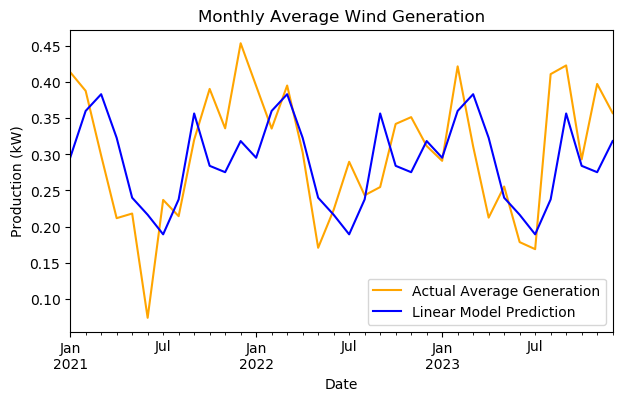

In [71]:
#Plotting actual temperatures vs. predictions of the linear model (using month of year as features)
test_data.set_index('date', inplace=True)
plt.figure(figsize=(7, 4), dpi=100)

test_data['electricity'].plot(label='Actual Average Generation', color='orange')
test_data['prediction'].plot(label='Linear Model Prediction', color='blue')

plt.title('Monthly Average Wind Generation')
plt.xlabel('Date')
plt.ylabel('Production (kW)')

plt.legend(loc='lower right')

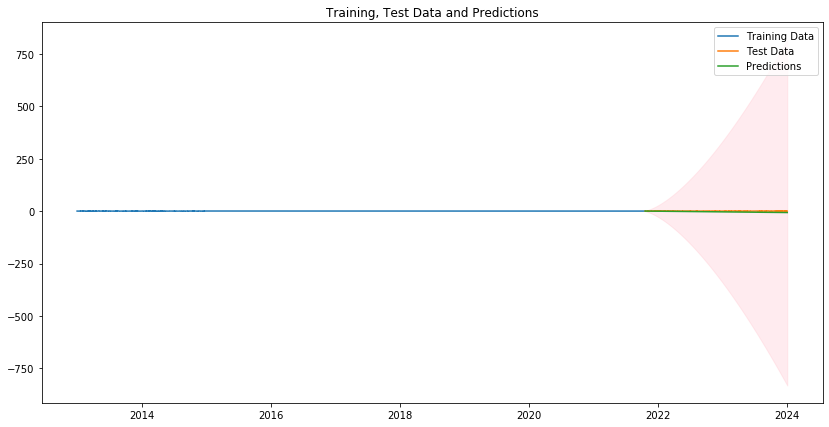

In [8]:
# Plot the training data, test data, and predictions
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predicted_mean, label='Predictions')
plt.fill_between(test.index, pred_conf_int.iloc[:, 0], pred_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Training, Test Data and Predictions')
plt.show()

In [9]:
# Generate synthetic data for one year (365*24 hours)
forecast_steps = 365 * 24
forecast = sarima_results.get_forecast(steps=forecast_steps)
synthetic_data = forecast.predicted_mean

In [10]:
print("Synthetic Data Sample:")
print(synthetic_data.head())

Synthetic Data Sample:
2021-10-19 14:00:00    0.208563
2021-10-19 15:00:00    0.234520
2021-10-19 16:00:00    0.254570
2021-10-19 17:00:00    0.247870
2021-10-19 18:00:00    0.235260
Freq: H, dtype: float64


In [11]:
synthetic_data


2021-10-19 14:00:00    0.208563
2021-10-19 15:00:00    0.234520
2021-10-19 16:00:00    0.254570
2021-10-19 17:00:00    0.247870
2021-10-19 18:00:00    0.235260
                         ...   
2022-10-19 09:00:00   -2.934201
2022-10-19 10:00:00   -2.949696
2022-10-19 11:00:00   -2.955032
2022-10-19 12:00:00   -2.949511
2022-10-19 13:00:00   -2.939326
Freq: H, Length: 8760, dtype: float64